In [73]:
print("hello")

hello


In [74]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [75]:
df = pd.read_csv("/content/drive/MyDrive/colab collection/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [76]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[["Age","Income($)"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [77]:
df["cluster"]=y_predicted
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

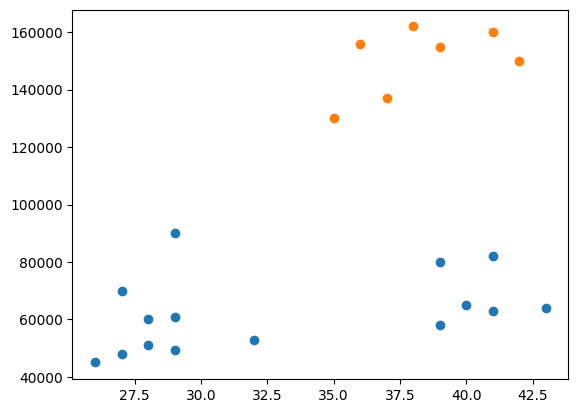

In [78]:
plt.scatter(df1["Age"],df1["Income($)"])
plt.scatter(df2["Age"],df2["Income($)"])
plt.scatter(df3["Age"],df3["Income($)"])

In [79]:
scalar = MinMaxScaler()
df["Income($)"] = scalar.fit_transform(df[["Income($)"]] )
df["Age"] = scalar.fit_transform(df[["Age"]])

In [80]:

km = KMeans(n_clusters=3)
y_predicted= km.fit_predict(df[["Age","Income($)"]])
y_predicted
df["cluster"]=y_predicted
df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


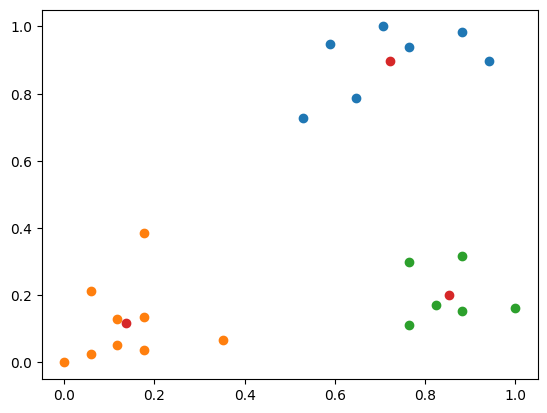

In [82]:

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


plt.scatter(df1["Age"],df1["Income($)"])
plt.scatter(df2["Age"],df2["Income($)"])
plt.scatter(df3["Age"],df3["Income($)"])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])

In [84]:
sse = []
k_rag = range(1,11)
for i in k_rag:
  km = KMeans(n_clusters=i)
  km.fit(df[["Age","Income($)"]])
  sse.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow Method')

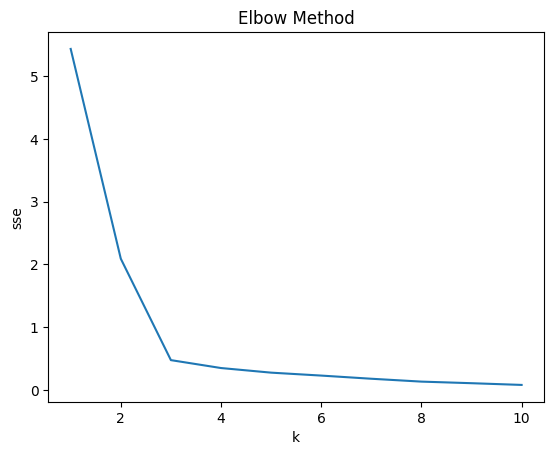

In [91]:
plt.plot(k_rag,sse)
plt.xlabel("k")
plt.ylabel("sse")
plt.title("Elbow Method")
